# Selection of the trend component of TS

In [1]:
import numpy as np
import numpy.random as rand
import seaborn as sbr
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
import scipy.stats as stats
from statsmodels.tsa import api as tsa
from math import factorial as fact
%matplotlib inline

C:\Users\PRINT\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


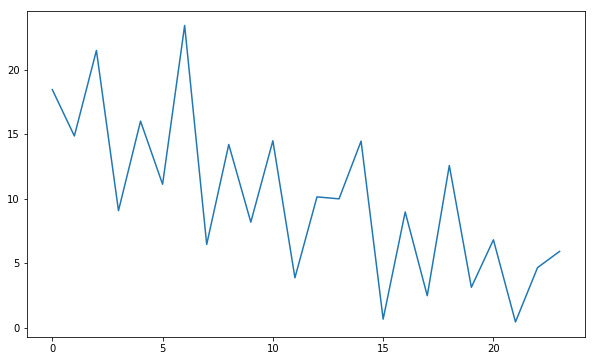

In [2]:
A = np.array([18.47, 14.87, 21.51, 9.07, 16.02, 11.12, 23.45, 6.45, 14.21, 8.18, 14.50, 3.86, 10.14, 9.99, 14.47, 0.65, 
              8.97, 2.47, 12.58, 3.12, 6.81, 0.43, 4.65, 5.91])
t = np.linspace(1, 24, num=24)

plt.figure(figsize=(10, 6))
plt.plot(A)

Сoefficients:  [17.66492754 -0.60686087]


C:\Users\PRINT\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


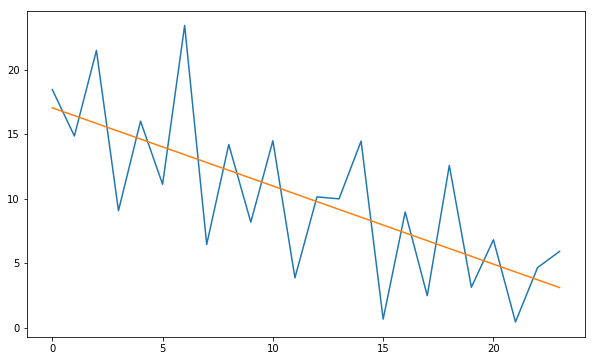

In [5]:
#Linear trend
Y = A.transpose()
X = np.ones((24, 2), dtype = int)
for i in range(0, X.shape[0]):
    X[i][1] = t[i]
B = np.linalg.lstsq(X, Y)
B = B[0]
print('Сoefficients: ', B)

T = B[0] + B[1] * t

plt.figure(figsize=(10, 6))
plt.plot(A)
plt.plot(T)

Сoefficients ^2:  [ 1.88240020e+01 -8.74339587e-01  1.06991487e-02]
Сoefficients ^3:  [ 1.83523057e+01 -6.68620865e-01 -9.45881333e-03  5.37545653e-04]


C:\Users\PRINT\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys
C:\Users\PRINT\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  from ipykernel import kernelapp as app


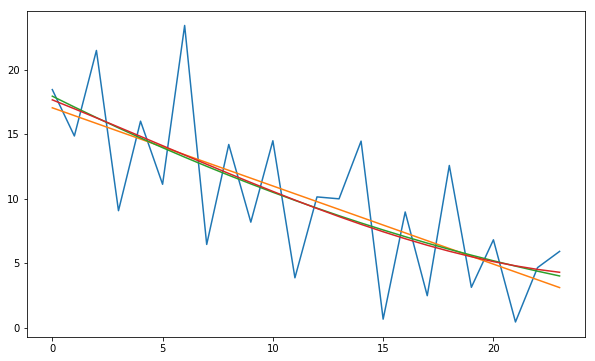

In [7]:
#Trend ^2
X2 = np.ones((24, 3), dtype = int)
for i in range(0, X.shape[0]):
    X2[i][1] = t[i]
    X2[i][2] = t[i]**2

B2 = np.linalg.lstsq(X2, Y)

#Trend ^3
X3 = np.ones((24, 4), dtype = int)
for i in range(0, X.shape[0]):
    X3[i][1] = t[i]
    X3[i][2] = t[i]**2
    X3[i][3] = t[i]**3
B3 = np.linalg.lstsq(X3, Y)
B2 = B2[0]
B3 = B3[0]

print('Сoefficients ^2: ', B2)
print('Сoefficients ^3: ', B3)

T2 = B2[0] + (B2[1]) * t + (B2[2]) * (t**2)
T3 = B3[0] + B3[1] * t + B3[2] * t**2 + B3[3] * t**3

plt.figure(figsize=(10, 6))
plt.plot(A)
plt.plot(T)
plt.plot(T2)
plt.plot(T3)

In [9]:
#Successive difference method
def dif(y, i, p):
    return dif(y, i, p - 1) - dif(y, i - 1, p - 1) if p > 0 else y[i]
def d(y, N, k):
    ret = 1 / (N - k) * sum(dif(y, i, k)**2 for i in range(1, N - k + 1))
    return ret / fact(2 * k) / (fact(k)**2) 

[1.30518917e+02 3.63796318e+01 2.96325714e+00 4.32953223e-02
 1.84460866e-04 3.14018753e-07 2.49776969e-10 1.11612321e-13
 2.99061132e-17 4.86720327e-21 5.05171189e-25 3.36767035e-29
 1.48745505e-33 4.80721128e-38 1.19527668e-42 2.35564331e-47
 3.86485228e-52 5.35109133e-57 6.03868213e-62 5.31647823e-67
 3.53498105e-72 1.76095456e-77 6.81384399e-83]
130.51891739130434


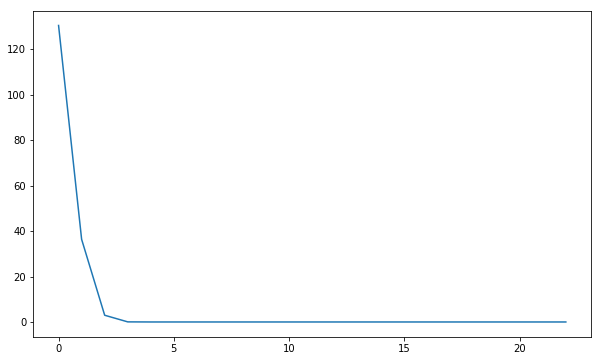

In [11]:
DK = np.zeros(23)
for i in range(0, DK.size):
    d_k = d(A, DK.size, i)
    DK[i] = d_k
d_k_f = d(A, 23, 0)

plt.figure(figsize=(10, 6))
plt.plot(DK)

print(DK)
print(d_k_f)

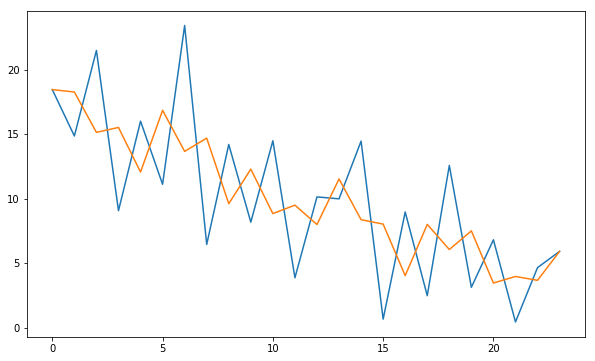

In [12]:
#Trend smoothing
smA = np.zeros(24)
smA[0] = A[0]
for i in range(1, A.shape[0] - 1):
    smA[i] = (A[i - 1] + A[i] + A[i + 1]) / 3
smA[23] = A[23]

plt.figure(figsize=(10, 6))
plt.plot(A)
plt.plot(smA)

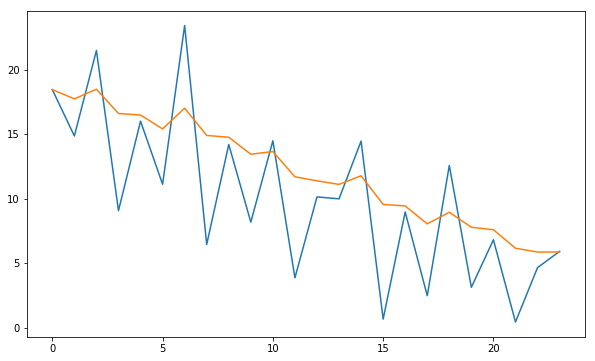

In [13]:
#Trend exponential smoothing
seA = np.zeros(24)
a = 0.2
seA[0] = A[0]
for i in range(1, A.shape[0]):
    seA[i] = (1 - a) * seA[i - 1] + a * A[i]

plt.figure(figsize=(10, 6))
plt.plot(A)
plt.plot(seA)